In [1]:
## Import library yang dibutuhkan
import pandas as pd
import warnings
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from joblib import dump
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


warnings.filterwarnings("ignore")

print("="*60)
print("🚀 MEMULAI PROSES ANALISIS SENTIMEN DENGAN SVM")
print("="*60)

🚀 MEMULAI PROSES ANALISIS SENTIMEN DENGAN SVM


In [2]:
# LOAD DATASET
print("\n📂 STEP 1: LOADING DATASET")
print("-" * 60)
data = pd.read_csv("dc_tweets_mbg_fix.csv")
print(f"✅ Dataset berhasil dimuat!")
print(f"📊 Jumlah baris: {len(data)}")
print(f"📊 Jumlah kolom: {len(data.columns)}")
print(f"📋 Nama kolom: {list(data.columns)}")
print("\n📌 Preview 5 data pertama:")
print(data.head())
print("\n📌 Info dataset:")
print(data.info())


📂 STEP 1: LOADING DATASET
------------------------------------------------------------
✅ Dataset berhasil dimuat!
📊 Jumlah baris: 4899
📊 Jumlah kolom: 2
📋 Nama kolom: ['Sentimen_Title', 'text']

📌 Preview 5 data pertama:
  Sentimen_Title                                               text
0        negatif    program makan gizi gratis kacau distribusi bagi
1         netral  kepala badan gizi nasional program makan gizi ...
2         netral  program makan gizi gratis selaras isu sehat ek...
3         netral            program makan gizi gratis terap sekolah
4         netral  satu layan penuh gizi distribusi makan pusat g...

📌 Info dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4899 entries, 0 to 4898
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Sentimen_Title  4899 non-null   object
 1   text            4885 non-null   object
dtypes: object(2)
memory usage: 76.7+ KB
None


In [3]:
# DATA CLEANING
print("\n\n🧹 STEP 2: DATA CLEANING")
print("-" * 60)
print(f"📊 Jumlah data awal: {len(data)}")
print(f"📊 Jumlah nilai NaN pada kolom 'text': {data['text'].isna().sum()}")

# Cek nilai kosong sebelum pembersihan
empty_strings = (data['text'].str.strip() == '').sum()
print(f"📊 Jumlah string kosong pada kolom 'text': {empty_strings}")

# Hapus baris dengan nilai kosong (NaN) atau string kosong pada kolom 'text'
data = data.dropna(subset=['text'])
data = data[data['text'].str.strip() != '']

print(f"✅ Jumlah data sesudah pembersihan: {len(data)}")
print(f"📊 Data yang dihapus: {len(data) - len(data)} baris")

# Tampilkan distribusi sentimen
print("\n📊 Distribusi Sentimen dalam Dataset:")
sentiment_dist = data["Sentimen_Title"].value_counts()
print(sentiment_dist)
print(f"\n📈 Persentase distribusi:")
print(data["Sentimen_Title"].value_counts(normalize=True) * 100)



🧹 STEP 2: DATA CLEANING
------------------------------------------------------------
📊 Jumlah data awal: 4899
📊 Jumlah nilai NaN pada kolom 'text': 14
📊 Jumlah string kosong pada kolom 'text': 0
✅ Jumlah data sesudah pembersihan: 4885
📊 Data yang dihapus: 0 baris

📊 Distribusi Sentimen dalam Dataset:
Sentimen_Title
negatif    2000
positif    1650
netral     1235
Name: count, dtype: int64

📈 Persentase distribusi:
Sentimen_Title
negatif    40.941658
positif    33.776868
netral     25.281474
Name: proportion, dtype: float64


In [4]:
# 3. TRAIN-TEST SPLIT
print("\n\n✂️ STEP 3: TRAIN-TEST SPLIT")
print("-" * 60)

# Fitur & Label
X_text = data["text"]
y = data["Sentimen_Title"].astype(str)

X_train, X_test, y_train, y_test = train_test_split(
    X_text, y, test_size=0.1, random_state=42, stratify=y
)

print(f"📊 Total data: {len(X_text)}")
print(f"📊 Data training: {len(X_train)} ({len(X_train)/len(X_text)*100:.1f}%)")
print(f"📊 Data testing: {len(X_test)} ({len(X_test)/len(X_text)*100:.1f}%)")
print(f"\n📊 Distribusi kelas pada data training:")
print(Counter(y_train))
print(f"\n📊 Distribusi kelas pada data testing:")
print(Counter(y_test))



✂️ STEP 3: TRAIN-TEST SPLIT
------------------------------------------------------------
📊 Total data: 4885
📊 Data training: 4396 (90.0%)
📊 Data testing: 489 (10.0%)

📊 Distribusi kelas pada data training:
Counter({'negatif': 1800, 'positif': 1485, 'netral': 1111})

📊 Distribusi kelas pada data testing:
Counter({'negatif': 200, 'positif': 165, 'netral': 124})


In [5]:
# TF-IDF VECTORIZER
print("\n\n🔤 STEP 4: TF-IDF VECTORIZATION")
print("-" * 60)

tfidf = TfidfVectorizer(max_features=5000)
print("⚙️ TF-IDF Parameters:")
print(f"   - Max features: 5000")
print(f"   - Stop words: None")

print("\n⏳ Proses fitting dan transformasi TF-IDF pada data training...")
X_train_tfidf = tfidf.fit_transform(X_train)

# Convert TF-IDF sparse matrix ke DataFrame untuk preview
tfidf_df = pd.DataFrame(X_train_tfidf.toarray(), columns=tfidf.get_feature_names_out())

print(f"✅ TF-IDF berhasil dibuat!")
print(f"📊 Dimensi TF-IDF: {tfidf_df.shape}")
print(f"📊 Jumlah fitur (kata unik): {len(tfidf.get_feature_names_out())}")
print(f"📊 Sparsity: {(1.0 - X_train_tfidf.nnz / (X_train_tfidf.shape[0] * X_train_tfidf.shape[1]))*100:.2f}%")

print("\n📌 Preview 10 fitur (kata) pertama:")
print(tfidf.get_feature_names_out()[:10])

print("\n📌 Preview TF-IDF matrix (5 dokumen pertama, 10 fitur pertama):")
print(tfidf_df.iloc[:5, :10])



🔤 STEP 4: TF-IDF VECTORIZATION
------------------------------------------------------------
⚙️ TF-IDF Parameters:
   - Max features: 5000
   - Stop words: None

⏳ Proses fitting dan transformasi TF-IDF pada data training...
✅ TF-IDF berhasil dibuat!
📊 Dimensi TF-IDF: (4396, 2938)
📊 Jumlah fitur (kata unik): 2938
📊 Sparsity: 99.78%

📌 Preview 10 fitur (kata) pertama:
['aaamiin' 'abah' 'abai' 'abal' 'abang' 'abdi' 'abistu' 'about' 'abraham'
 'abu']

📌 Preview TF-IDF matrix (5 dokumen pertama, 10 fitur pertama):
   aaamiin  abah  abai  abal  abang  abdi  abistu  about  abraham  abu
0      0.0   0.0   0.0   0.0    0.0   0.0     0.0    0.0      0.0  0.0
1      0.0   0.0   0.0   0.0    0.0   0.0     0.0    0.0      0.0  0.0
2      0.0   0.0   0.0   0.0    0.0   0.0     0.0    0.0      0.0  0.0
3      0.0   0.0   0.0   0.0    0.0   0.0     0.0    0.0      0.0  0.0
4      0.0   0.0   0.0   0.0    0.0   0.0     0.0    0.0      0.0  0.0


In [6]:
# SMOTE BALANCING
print("\n\n⚖️ STEP 5: SMOTE BALANCING")
print("-" * 60)

print("📊 Distribusi kelas SEBELUM SMOTE:")
before_smote = Counter(y_train)
for label, count in before_smote.items():
    print(f"   {label}: {count} ({count/len(y_train)*100:.2f}%)")

print("\n⏳ Proses SMOTE balancing...")
smote = SMOTE(random_state=32)
X_train_dense = X_train_tfidf.toarray()
X_train_res, y_train_res = smote.fit_resample(X_train_dense, y_train)

print("✅ SMOTE berhasil!")
print("\n📊 Distribusi kelas SESUDAH SMOTE:")
after_smote = Counter(y_train_res)
for label, count in after_smote.items():
    print(f"   {label}: {count} ({count/len(y_train_res)*100:.2f}%)")

print(f"\n📊 Dimensi data setelah SMOTE:")
print(f"   X_train_res: {X_train_res.shape}")
print(f"   y_train_res: {y_train_res.shape}")
print(f"\n📈 Jumlah sampel sintetis yang dibuat: {len(y_train_res) - len(y_train)}")



⚖️ STEP 5: SMOTE BALANCING
------------------------------------------------------------
📊 Distribusi kelas SEBELUM SMOTE:
   negatif: 1800 (40.95%)
   positif: 1485 (33.78%)
   netral: 1111 (25.27%)

⏳ Proses SMOTE balancing...
✅ SMOTE berhasil!

📊 Distribusi kelas SESUDAH SMOTE:
   negatif: 1800 (33.33%)
   positif: 1800 (33.33%)
   netral: 1800 (33.33%)

📊 Dimensi data setelah SMOTE:
   X_train_res: (5400, 2938)
   y_train_res: (5400,)

📈 Jumlah sampel sintetis yang dibuat: 1004


In [7]:
# 6. TRAIN MODEL SVM
print("\n\n🤖 STEP 6: TRAINING MODEL SVM")
print("-" * 60)

print("⚙️ SVM Parameters:")
print(f"   - Kernel: linear")
print(f"   - Probability: True")
print(f"   - Random state: 42")

print("\n⏳ Proses training model SVM...")
model = SVC(kernel="linear", probability=True, random_state=42)
model.fit(X_train_res, y_train_res)

print("✅ Model SVM berhasil dilatih!")
print(f"📊 Jumlah support vectors: {model.n_support_}")
print(f"📊 Support vectors per kelas: {dict(zip(model.classes_, model.n_support_))}")



🤖 STEP 6: TRAINING MODEL SVM
------------------------------------------------------------
⚙️ SVM Parameters:
   - Kernel: linear
   - Probability: True
   - Random state: 42

⏳ Proses training model SVM...
✅ Model SVM berhasil dilatih!
📊 Jumlah support vectors: [441 590 575]
📊 Support vectors per kelas: {'negatif': np.int32(441), 'netral': np.int32(590), 'positif': np.int32(575)}




📈 STEP 7: EVALUASI MODEL
------------------------------------------------------------
⏳ Proses transformasi data test dan prediksi...
✅ Prediksi selesai!
📊 Jumlah prediksi: 489

📊 CONFUSION MATRIX:
         negatif  netral  positif
negatif      183       8        9
netral         8     112        4
positif        5       9      151


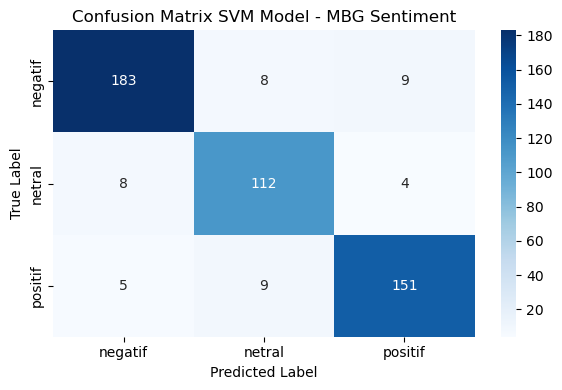


📊 CLASSIFICATION REPORT:
              precision    recall  f1-score   support

     negatif       0.93      0.92      0.92       200
      netral       0.87      0.90      0.89       124
     positif       0.92      0.92      0.92       165

    accuracy                           0.91       489
   macro avg       0.91      0.91      0.91       489
weighted avg       0.91      0.91      0.91       489

🎯 ACCURACY: 0.9121 (91.21%)

📊 Distribusi prediksi:
   positif: 164 (33.54%)
   negatif: 196 (40.08%)
   netral: 129 (26.38%)


In [8]:
# EVALUASI MODEL
print("\n\n📈 STEP 7: EVALUASI MODEL")
print("-" * 60)

print("⏳ Proses transformasi data test dan prediksi...")
X_test_tfidf = tfidf.transform(X_test).toarray()
y_pred = model.predict(X_test_tfidf)

print("✅ Prediksi selesai!")
print(f"📊 Jumlah prediksi: {len(y_pred)}")

# Confusion Matrix
print("\n📊 CONFUSION MATRIX:")
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index=model.classes_, columns=model.classes_)
print(cm_df)

# ======== PLOT CONFUSION MATRIX ========
plt.figure(figsize=(6, 4))
sns.heatmap(cm_df, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix SVM Model - MBG Sentiment")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()
# ========================================

# Classification Report
print("\n📊 CLASSIFICATION REPORT:")
print(classification_report(y_test, y_pred))

# Accuracy
acc = accuracy_score(y_test, y_pred)
print(f"🎯 ACCURACY: {acc:.4f} ({acc*100:.2f}%)")

# Prediksi per kelas
print("\n📊 Distribusi prediksi:")
pred_dist = Counter(y_pred)
for label, count in pred_dist.items():
    print(f"   {label}: {count} ({count/len(y_pred)*100:.2f}%)")




📈 STEP 8: ROC CURVE MULTICLASS
------------------------------------------------------------


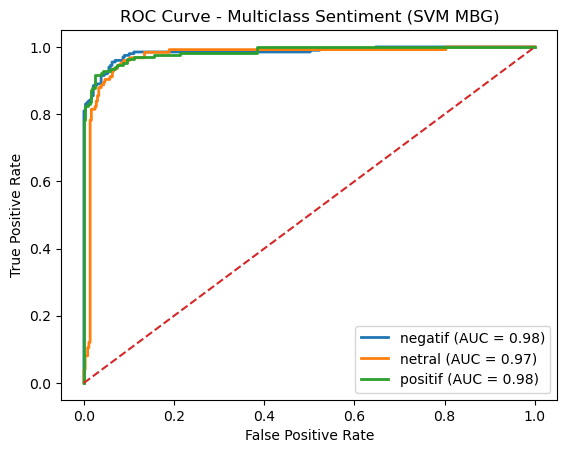

📌 ROC Curve berhasil dibuat!


In [9]:
# ROC CURVE MULTICLASS
print("\n\n📈 STEP 8: ROC CURVE MULTICLASS")
print("-" * 60)

from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Binarize label (One-vs-Rest)
classes = model.classes_
y_test_bin = label_binarize(y_test, classes=classes)

# Ambil probabilitas prediksi dari SVM
y_score = model.predict_proba(X_test_tfidf)

# Plot ROC Curve
plt.figure()
for i, label in enumerate(classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, linewidth=2, label=f"{label} (AUC = {roc_auc:.2f})")

# Plot baseline
plt.plot([0, 1], [0, 1], linestyle="--")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Multiclass Sentiment (SVM MBG)")
plt.legend(loc="lower right")
plt.show()

print("📌 ROC Curve berhasil dibuat!")


In [10]:
# SAVE MODEL
print("\n\n💾 STEP 8: MENYIMPAN MODEL")
print("-" * 60)

dump(tfidf, "tfidf_mbg.pkl")
print("✅ TF-IDF saved as: tfidf_mbg.pkl")

dump(model, "model_svm_mbg.pkl")
print("✅ Model saved as: model_svm_mbg.pkl")

print("\n" + "="*60)
print("🎉 PROSES SELESAI!")
print("="*60)



💾 STEP 8: MENYIMPAN MODEL
------------------------------------------------------------
✅ TF-IDF saved as: tfidf_mbg.pkl
✅ Model saved as: model_svm_mbg.pkl

🎉 PROSES SELESAI!
